<a href="https://colab.research.google.com/github/Only-Mike/ADHD/blob/main/Bigfive_cluster_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/data.csv', sep = '\s+')

In [3]:
df

race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  \
0         3   53       1       1     1       1      US   4   2   5  ...   4   
1        13   46       1       2     1       1      US   2   2   3  ...   3   
2         1   14       2       2     1       1      PK   5   1   1  ...   4   
3         3   19       2       2     1       1      RO   2   5   2  ...   4   
4        11   25       2       2     1       2      US   3   1   3  ...   3   
...     ...  ...     ...     ...   ...     ...     ...  ..  ..  ..  ...  ..   
19714    11   15       1       2     1       2      SG   1   4   3  ...   1   
19715     3   37       1       2     1       2      US   2   3   2  ...   1   
19716     5   16       2       1     1       2      US   2   5   4  ...   5   
19717    12   16       1       1     1       5      NG   1   4   2  ...   3   
19718     3   35       1       1     1       1      US   2   3   1  ...   5   

       O2  O3  O4  O5  O6  O7  O8  O9  O10  
0       1   3   1   5   1   4   2   5  5.0  
1       3   3   3   2   3   3   1   3  2.0  
2       5   5   1   5   1   5   5   5  5.0  
3       3   5   2   4   2   5   2   5  5.0  
4       1   1   1   3   1   3   1   5  3.0  
...    ..  ..  ..  ..  ..  ..  ..  ..  ...  
19714   3   5   3   4   1   4   2   5  3.0  
19715   2   3   2   3   3   4   2   3  3.0  
19716   3   1   3   4   1   1   5   5  5.0  
19717   2   5   3   4   1   5   3   5  5.0  
19718   1   5   1   4   1   5   5   5  5.0  

[19719 rows x 57 columns]

In [4]:
df['country'].unique()

array(['US', 'PK', 'RO', 'IN', 'IT', 'FR', 'GB', 'LT', 'CA', 'GR', 'DK',
       'MX', 'SE', 'JO', 'NO', 'IE', 'NZ', 'FI', 'BE', 'HR', 'ZA', 'PL',
       'BR', 'SK', 'SA', 'PH', 'AU', 'JP', 'ID', 'MY', 'KW', 'OM', 'TR',
       'SG', 'IL', 'DE', 'AE', 'BT', 'AR', 'RS', 'GH', 'NL', 'MU', 'KE',
       '(nu', 'AT', 'TZ', 'ES', nan, 'HU', 'RU', 'UG', 'PT', 'HK', 'CO',
       'CN', 'BH', 'ME', 'BZ', 'SI', 'CZ', 'CH', 'LK', 'EG', 'TH', 'BG',
       'AZ', 'PR', 'NP', 'FJ', 'CM', 'BD', 'VN', 'LB', 'PW', 'MA', 'IR',
       'EE', 'JM', 'UA', 'MM', 'A1', 'KR', 'CY', 'JE', 'QA', 'MK', 'VE',
       'IS', 'NG', 'ZW', 'CR', 'CL', 'SY', 'DO', 'AL', 'SV', 'TT', 'EU',
       'BM', 'HT', 'TW', 'MZ', 'BW', 'BF', 'TN', 'IM', 'BA', 'KZ', 'GG',
       'SD', 'HN', 'GE', 'KH', 'PG', 'MV', 'A2', 'RW', 'LS', 'PE', 'BB',
       'LA', 'BO', 'VC', 'PA', 'BN', 'AG', 'LV', 'MP', 'EC', 'MT', 'GP',
       'AS', 'AP', 'FO', 'NI', 'GU', 'DZ', 'BS', 'SR', 'GY', 'LY', 'IQ',
       'GT', 'VI', 'KY', 'MN', 'ET', 'AO', '4', 'UY

In [5]:
df = df.drop(columns = ['race', 'engnat', 'source', 'country', 'O10'])

In [6]:
df.describe().T

count          mean           std   min   25%   50%   75%  \
age     19719.0  50767.027892  7.121272e+06  13.0  18.0  22.0  31.0   
gender  19719.0      1.616918  4.991217e-01   0.0   1.0   2.0   2.0   
hand    19719.0      1.130128  4.136633e-01   0.0   1.0   1.0   1.0   
E1      19719.0      2.628886  1.232530e+00   0.0   2.0   3.0   4.0   
E2      19719.0      2.759724  1.313818e+00   0.0   2.0   3.0   4.0   
E3      19719.0      3.416806  1.236824e+00   0.0   3.0   4.0   4.0   
E4      19719.0      3.151985  1.222807e+00   0.0   2.0   3.0   4.0   
E5      19719.0      3.432172  1.282040e+00   0.0   2.0   4.0   5.0   
E6      19719.0      2.452711  1.241661e+00   0.0   1.0   2.0   3.0   
E7      19719.0      2.867336  1.431872e+00   0.0   2.0   3.0   4.0   
E8      19719.0      3.376287  1.266457e+00   0.0   2.0   3.0   4.0   
E9      19719.0      3.094376  1.396411e+00   0.0   2.0   3.0   4.0   
E10     19719.0      3.585222  1.304695e+00   0.0   3.0   4.0   5.0   
N1      19719.0      3.262184  1.308072e+00   0.0   2.0   3.0   4.0   
N2      19719.0      3.234596  1.177018e+00   0.0   2.0   3.0   4.0   
N3      19719.0      3.842639  1.138914e+00   0.0   3.0   4.0   5.0   
N4      19719.0      2.756225  1.221016e+00   0.0   2.0   3.0   4.0   
N5      19719.0      2.951722  1.272889e+00   0.0   2.0   3.0   4.0   
N6      19719.0      2.980374  1.320437e+00   0.0   2.0   3.0   4.0   
N7      19719.0      3.151935  1.299910e+00   0.0   2.0   3.0   4.0   
N8      19719.0      2.803235  1.350648e+00   0.0   2.0   3.0   4.0   
N9      19719.0      3.135250  1.298573e+00   0.0   2.0   3.0   4.0   
N10     19719.0      2.833764  1.313036e+00   0.0   2.0   3.0   4.0   
A1      19719.0      2.312237  1.369368e+00   0.0   1.0   2.0   3.0   
A2      19719.0      3.926416  1.078712e+00   0.0   3.0   4.0   5.0   
A3      19719.0      2.162939  1.216153e+00   0.0   1.0   2.0   3.0   
A4      19719.0      4.029920  1.045480e+00   0.0   4.0   4.0   5.0   
A5      19719.0      2.166033  1.141798e+00   0.0   1.0   2.0   3.0   
A6      19719.0      3.895989  1.130623e+00   0.0   3.0   4.0   5.0   
A7      19719.0      2.160759  1.132118e+00   0.0   1.0   2.0   3.0   
A8      19719.0      3.766520  1.035946e+00   0.0   3.0   4.0   5.0   
A9      19719.0      3.944673  1.085517e+00   0.0   3.0   4.0   5.0   
A10     19719.0      3.682337  1.052679e+00   0.0   3.0   4.0   5.0   
C1      19719.0      3.318525  1.099575e+00   0.0   3.0   3.0   4.0   
C2      19719.0      2.978853  1.367322e+00   0.0   2.0   3.0   4.0   
C3      19719.0      3.982910  1.003019e+00   0.0   3.0   4.0   5.0   
C4      19719.0      2.654242  1.243191e+00   0.0   2.0   3.0   4.0   
C5      19719.0      2.700441  1.249719e+00   0.0   2.0   3.0   4.0   
C6      19719.0      2.922816  1.399225e+00   0.0   2.0   3.0   4.0   
C7      19719.0      3.646585  1.152885e+00   0.0   3.0   4.0   5.0   
C8      19719.0      2.481414  1.132892e+00   0.0   2.0   2.0   3.0   
C9      19719.0      3.224555  1.246227e+00   0.0   2.0   3.0   4.0   
C10     19719.0      3.637203  1.012663e+00   0.0   3.0   4.0   4.0   
O1      19719.0      3.692327  1.116465e+00   0.0   3.0   4.0   5.0   
O2      19719.0      2.149703  1.135198e+00   0.0   1.0   2.0   3.0   
O3      19719.0      4.126122  1.006806e+00   0.0   4.0   4.0   5.0   
O4      19719.0      2.079467  1.109770e+00   0.0   1.0   2.0   3.0   
O5      19719.0      3.873016  9.396548e-01   0.0   3.0   4.0   5.0   
O6      19719.0      1.794817  1.068594e+00   0.0   1.0   1.0   2.0   
O7      19719.0      4.072925  9.236261e-01   0.0   4.0   4.0   5.0   
O8      19719.0      3.208023  1.258921e+00   0.0   2.0   3.0   4.0   
O9      19719.0      4.133577  9.828677e-01   0.0   4.0   4.0   5.0   

                max  
age     999999999.0  
gender          3.0  
hand            3.0  
E1              5.0  
E2              5.0  
E3              5.0  
E4              5.0  
E5              5.0  
E6              5.0  
E7              5.0  
E8  

In [7]:
df['age'].unique()

array([       53,        46,        14,        19,        25,        31,
              20,        23,        39,        18,        17,        15,
              22,        21,        28,        26,        29,        52,
              48,        37,        42,        27,        60,        24,
              47,        35,        34,        36,        54,        45,
              32,        49,        13,        33,        16,        30,
              59,        41,        44,        43,        38,      1997,
              40,        55,        58,        51,        57,      1995,
              56,        68,        70,        50,        76,        63,
              65,      1994,        62,        61,        67,        69,
            1992,        66,      1988,      1990,      1999,        74,
              73,        64,        71,      1989,        72,      1984,
       999999999,      1993,       208,      1996,        75,      1982,
            1991,      1998,      1961,        92, 

In [8]:
df = df[df['age'] <= 100]

In [9]:
df['age'].unique()


array([ 53,  46,  14,  19,  25,  31,  20,  23,  39,  18,  17,  15,  22,
        21,  28,  26,  29,  52,  48,  37,  42,  27,  60,  24,  47,  35,
        34,  36,  54,  45,  32,  49,  13,  33,  16,  30,  59,  41,  44,
        43,  38,  40,  55,  58,  51,  57,  56,  68,  70,  50,  76,  63,
        65,  62,  61,  67,  69,  66,  74,  73,  64,  71,  72,  75,  92,
       100,  77,  97,  80,  99,  79,  78])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19636 entries, 0 to 19718
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     19636 non-null  int64
 1   gender  19636 non-null  int64
 2   hand    19636 non-null  int64
 3   E1      19636 non-null  int64
 4   E2      19636 non-null  int64
 5   E3      19636 non-null  int64
 6   E4      19636 non-null  int64
 7   E5      19636 non-null  int64
 8   E6      19636 non-null  int64
 9   E7      19636 non-null  int64
 10  E8      19636 non-null  int64
 11  E9      19636 non-null  int64
 12  E10     19636 non-null  int64
 13  N1      19636 non-null  int64
 14  N2      19636 non-null  int64
 15  N3      19636 non-null  int64
 16  N4      19636 non-null  int64
 17  N5      19636 non-null  int64
 18  N6      19636 non-null  int64
 19  N7      19636 non-null  int64
 20  N8      19636 non-null  int64
 21  N9      19636 non-null  int64
 22  N10     19636 non-null  int64
 23  A1      196

In [11]:
#df['O10'].fillna(df['O10'].mean())

In [12]:
#df['O10'].replace(('nan', 5))

In [13]:
df.iloc[:, 3:53] = df.iloc[:, 3:53].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [14]:
df.describe().T

count       mean        std   min   25%   50%   75%    max
age     19636.0  26.263801  11.567487  13.0  18.0  22.0  31.0  100.0
gender  19636.0   1.616317   0.498908   0.0   1.0   2.0   2.0    3.0
hand    19636.0   1.130016   0.412873   0.0   1.0   1.0   1.0    3.0
E1      19636.0   2.628641   1.232363   0.0   2.0   3.0   4.0    5.0
E2      19636.0   2.759727   1.313819   0.0   2.0   3.0   4.0    5.0
E3      19636.0   3.417040   1.236526   0.0   3.0   4.0   4.0    5.0
E4      19636.0   3.152577   1.222630   0.0   2.0   3.0   4.0    5.0
E5      19636.0   3.432726   1.282507   0.0   2.0   4.0   5.0    5.0
E6      19636.0   2.452078   1.241050   0.0   1.0   2.0   3.0    5.0
E7      19636.0   2.867743   1.431600   0.0   2.0   3.0   4.0    5.0
E8      19636.0   3.377317   1.265826   0.0   2.0   3.0   4.0    5.0
E9      19636.0   3.094367   1.395948   0.0   2.0   3.0   4.0    5.0
E10     19636.0   3.585506   1.303995   0.0   3.0   4.0   5.0    5.0
N1      19636.0   3.261560   1.307957   0.0   2.0   3.0   4.0    5.0
N2      19636.0   3.235639   1.176692   0.0   2.0   3.0   4.0    5.0
N3      19636.0   3.842891   1.138540   0.0   3.0   4.0   5.0    5.0
N4      19636.0   2.756620   1.220608   0.0   2.0   3.0   4.0    5.0
N5      19636.0   2.950906   1.272752   0.0   2.0   3.0   4.0    5.0
N6      19636.0   2.979731   1.319921   0.0   2.0   3.0   4.0    5.0
N7      19636.0   3.152322   1.299574   0.0   2.0   3.0   4.0    5.0
N8      19636.0   2.803015   1.350590   0.0   2.0   3.0   4.0    5.0
N9      19636.0   3.133836   1.298101   0.0   2.0   3.0   4.0    5.0
N10     19636.0   2.833520   1.312663   0.0   2.0   3.0   4.0    5.0
A1      19636.0   2.309330   1.367809   0.0   1.0   2.0   3.0    5.0
A2      19636.0   3.927226   1.078271   0.0   3.0   4.0   5.0    5.0
A3      19636.0   2.163985   1.215886   0.0   1.0   2.0   3.0    5.0
A4      19636.0   4.030709   1.044721   0.0   4.0   4.0   5.0    5.0
A5      19636.0   2.165461   1.141290   0.0   1.0   2.0   3.0    5.0
A6      19636.0   3.895193   1.130639   0.0   3.0   4.0   5.0    5.0
A7      19636.0   2.160165   1.131967   0.0   1.0   2.0   3.0    5.0
A8      19636.0   3.767519   1.035251   0.0   3.0   4.0   5.0    5.0
A9      19636.0   3.943879   1.085595   0.0   3.0   4.0   5.0    5.0
A10     19636.0   3.682929   1.051946   0.0   3.0   4.0   5.0    5.0
C1      19636.0   3.318548   1.099216   0.0   3.0   3.0   4.0    5.0
C2      19636.0   2.979935   1.367007   0.0   2.0   3.0   4.0    5.0
C3      19636.0   3.983245   1.002200   0.0   3.0   4.0   5.0    5.0
C4      19636.0   2.655072   1.243323   0.0   2.0   3.0   4.0    5.0
C5      19636.0   2.698818   1.249371   0.0   2.0   3.0   4.0    5.0
C6      19636.0   2.923712   1.399038   0.0   2.0   3.0   4.0    5.0
C7      19636.0   3.647484   1.151960   0.0   3.0   4.0   5.0    5.0
C8      19636.0   2.481768   1.132668   0.0   2.0   2.0   3.0    5.0
C9      19636.0   3.223467   1.245914   0.0   2.0   3.0   4.0    5.0
C10     19636.0   3.636942   1.012747   0.0   3.0   4.0   4.0    5.0
O1      19636.0   3.694999   1.115311   0.0   3.0   4.0   5.0    5.0
O2      19636.0   2.147179   1.133212   0.0   1.0   2.0   3.0    5.0
O3      19636.0   4.127725   1.005958   0.0   4.0   4.0   5.0    5.0
O4      19636.0   2.076900   1.108154   0.0   1.0   2.0   3.0    5.0
O5      19636.0   3.873956   0.938741   0.0   3.0   4.0   5.0    5.0
O6      19636.0   1.794357   1.068464   0.0   1.0   1.0   2.0    5.0
O7      19636.0   4.074302   0.922033   0.0   4.0   4.0   5.0    5.0
O8      19636.0   3.210837   1.257828   0.0   2.0   3.0   4.0    5.0
O9      19636.0   4.134803   0.981888   0.0   4.0   4.0   5.0    5.0

In [15]:
#We will scale the data which requires the following tool
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
!pip install -U matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#df = df.loc[~df.index.duplicated(), :]

In [17]:
df_scaled = scaler.fit_transform(df)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [19]:
# fit and transform the data
df_reduced_pca = pca.fit_transform(df_scaled)

In [20]:
pca.components_.shape

(2, 52)

In [21]:
print(pca.explained_variance_ratio_)

[0.15424833 0.09000359]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

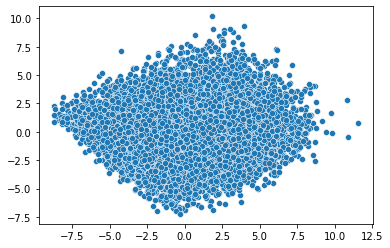

In [22]:
sns.scatterplot(df_reduced_pca[:,0],df_reduced_pca[:,1])

In [23]:
import altair as alt
vis_data = pd.DataFrame(df_reduced_pca)
vis_data['gender'] = df['gender']
vis_data['age'] = df['age']
vis_data.columns = ['x', 'y', 'gender', 'age']

In [24]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [25]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['gender', 'age']
).interactive()

alt.Chart(...)

<AxesSubplot:>

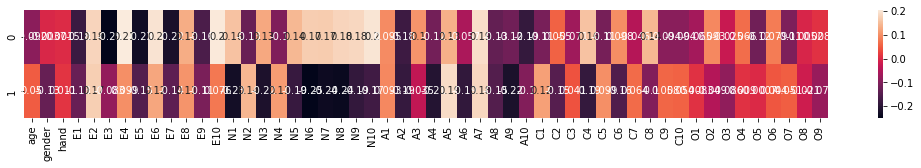

In [26]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=df.columns), annot=True)

<AxesSubplot:>

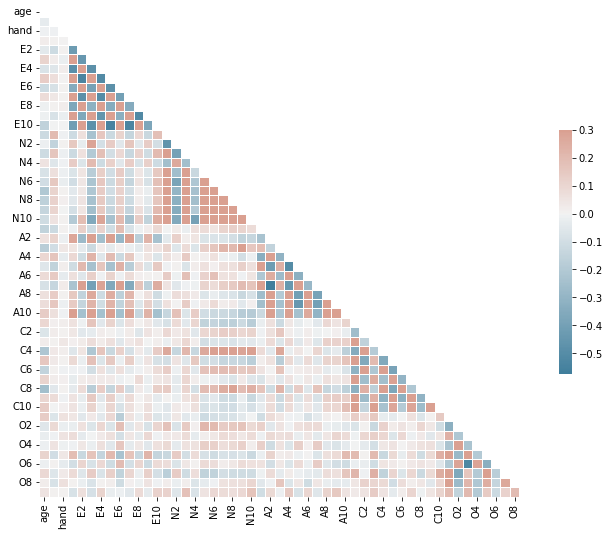

In [27]:
#Correlation check

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
!pip install umap-learn -q
import umap

In [29]:
umap_scaler = umap.UMAP()

In [30]:
embeddings = umap_scaler.fit_transform(df)

In [31]:
from matplotlib import rcParams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

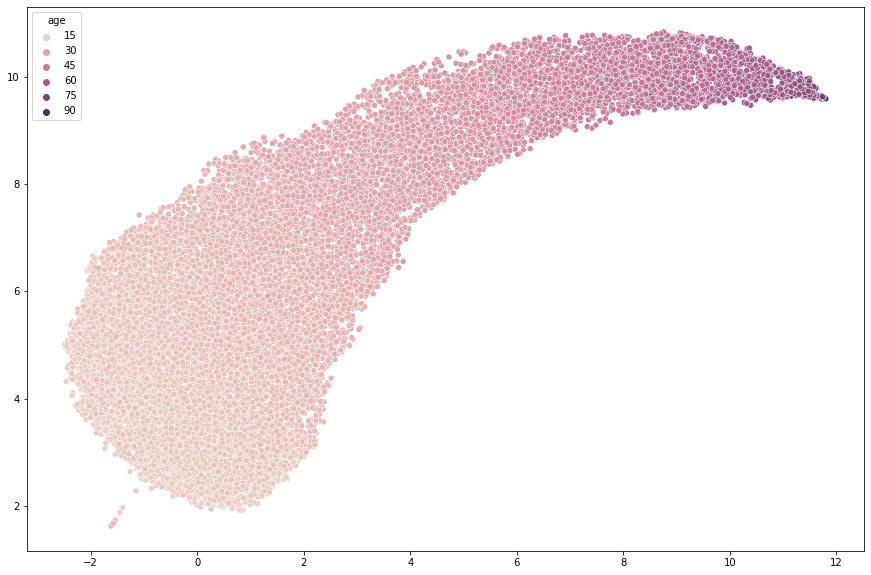

In [46]:
rcParams['figure.figsize'] = 15,10
sns.scatterplot(embeddings[:,0],embeddings[:,1], hue = df['age'], sizes=(400, 400))

In [33]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [34]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

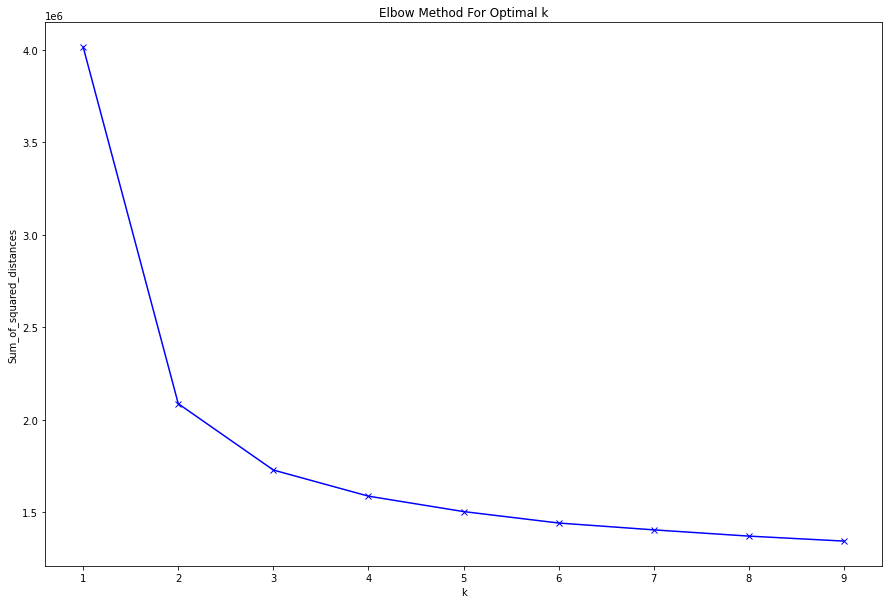

In [35]:
#Using the elbow method to plot for the optimal k (Noget i tvivl om det vil give mest mening med 3 eller 6)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

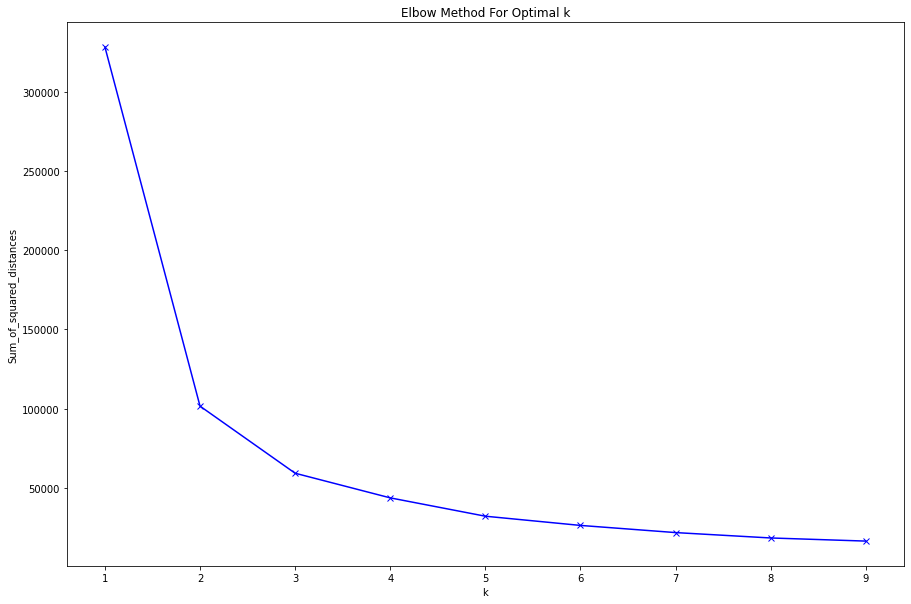

In [36]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(df)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [37]:
clusterer.fit(df)

KMeans(n_clusters=3)

In [38]:
df['cluster'] = clusterer.labels_

In [39]:
df.groupby('cluster').age.mean()

cluster
0    31.833474
1    51.187859
2    19.269101
Name: age, dtype: float64

In [40]:
vis_data = pd.DataFrame(embeddings)
vis_data['gender'] = df['gender']
vis_data['cluster'] = df['cluster']
vis_data['age'] = df['age']
vis_data.columns = ['x', 'y', 'gender', 'cluster','age']

In [41]:
vis_data['cluster'].value_counts()

2.0    12409
0.0     4716
1.0     2428
Name: cluster, dtype: int64

In [42]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['gender', 'age'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2'))
).interactive()

alt.Chart(...)